# 주택 가격 예측하기!

메인퀘스트에 오신 것을 환영합니다!

이번 퀘스트의 목표는 여러 특성들을 종합적으로 고려하여 가장 주택 가격을 잘 예측하는 회귀모델을 만드는 것입니다.

- 예측할 값(y): SalePrice
- 평가지표: RMSE

퀘스트 진행 방식:

1. Code 란에서 테스트 노트북을 Copy&Edit 하여 작업!
2. 테스트 노트북을 submit 하여 리더보드에 정상적으로 등록되는지 확인하기
3. 자유롭게 모델을 발전시켜 좋은 성적 거두기!
4. 정상적으로 submit하고, 다음 구글폼에 이름/노트북주소/닉네임 등록!!!
- https://docs.google.com/forms/d/e/1FAIpQLSc0kXVZ9PRLbjsxBysCSSYLDiU4Hd9DLTvFrCFep4HLZLbL8w/viewform?usp=header

예시 형식:
~~~
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
~~~

### 데이터 확인 및 불러오기

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

특성이 너무 많습니다! 어떻게 하면 좋을까요?

참고로 각각의 특성은 다음을 나타냅니다.

| 변수명               | 설명 (한국어)                         |
| ----------------- | -------------------------------- |
| **SalePrice**     | 주택의 판매 가격(달러). 예측해야 하는 타겟 변수     |
| **MSSubClass**    | 건물 등급(건물 종류 분류)                  |
| **MSZoning**      | 토지 용도 구분(일반적인 구역 분류)             |
| **LotFrontage**   | 도로에 접한 토지 길이 (피트 단위)             |
| **LotArea**       | 토지 면적 (평방 피트)                    |
| **Street**        | 도로 접근 방식                         |
| **Alley**         | 골목(후면 도로) 접근 방식                  |
| **LotShape**      | 토지의 전반적인 모양                      |
| **LandContour**   | 토지의 평탄도                          |
| **Utilities**     | 사용 가능한 공공시설(전기, 수도 등)            |
| **LotConfig**     | 토지 배치 형태                         |
| **LandSlope**     | 토지의 경사도                          |
| **Neighborhood**  | Ames 시 내의 물리적 위치(주변 지역)          |
| **Condition1**    | 주요 도로·철도에 대한 근접도                 |
| **Condition2**    | 두 번째 주요 도로·철도에 대한 근접도            |
| **BldgType**      | 주거 건물 유형 (단독, 다세대 등)             |
| **HouseStyle**    | 주택의 건축 양식                        |
| **OverallQual**   | 자재 및 마감 품질 종합 평가                 |
| **OverallCond**   | 주택의 전반적인 상태 평가                   |
| **YearBuilt**     | 최초 건축 연도                         |
| **YearRemodAdd**  | 리모델링/개조 연도                       |
| **RoofStyle**     | 지붕 스타일                           |
| **RoofMatl**      | 지붕 재료                            |
| **Exterior1st**   | 외장 마감재(주 재료)                     |
| **Exterior2nd**   | 외장 마감재(보조 재료, 2번째)               |
| **MasVnrType**    | 석조 베니어 타입                        |
| **MasVnrArea**    | 석조 베니어 면적 (평방 피트)                |
| **ExterQual**     | 외장재 품질 평가                        |
| **ExterCond**     | 외장재 상태 평가                        |
| **Foundation**    | 기초(Foundation) 유형                |
| **BsmtQual**      | 지하실 높이 평가                        |
| **BsmtCond**      | 지하실 상태 평가                        |
| **BsmtExposure**  | 지하실 외부 노출 여부(출입구/창문 등)           |
| **BsmtFinType1**  | 주요 지하실 마감 구역 유형                  |
| **BsmtFinSF1**    | 주요 지하실 마감 면적 (평방 피트)             |
| **BsmtFinType2**  | 보조 지하실 마감 구역 유형                  |
| **BsmtFinSF2**    | 보조 지하실 마감 면적 (평방 피트)             |
| **BsmtUnfSF**     | 미완성 지하실 면적 (평방 피트)               |
| **TotalBsmtSF**   | 지하실 전체 면적 (평방 피트)                |
| **Heating**       | 난방 시스템 종류                        |
| **HeatingQC**     | 난방 품질 및 상태                       |
| **CentralAir**    | 중앙 에어컨 설치 여부                     |
| **Electrical**    | 전기 시스템 종류                        |
| **1stFlrSF**      | 1층 면적 (평방 피트)                    |
| **2ndFlrSF**      | 2층 면적 (평방 피트)                    |
| **LowQualFinSF**  | 저품질 마감 공간 면적 (전체 층 합산)           |
| **GrLivArea**     | 지상(Above grade) 생활 공간 면적 (평방 피트) |
| **BsmtFullBath**  | 지하실 완비 욕실 수                      |
| **BsmtHalfBath**  | 지하실 반 욕실 수                       |
| **FullBath**      | 지상 완비 욕실 수                       |
| **HalfBath**      | 지상 반 욕실 수                        |
| **Bedroom**       | 지하실 제외 침실 수                      |
| **Kitchen**       | 주방 수                             |
| **KitchenQual**   | 주방 품질                            |
| **TotRmsAbvGrd**  | 지상 전체 방 개수 (욕실 제외)               |
| **Functional**    | 주택 기능성 평가                        |
| **Fireplaces**    | 벽난로 개수                           |
| **FireplaceQu**   | 벽난로 품질                           |
| **GarageType**    | 차고 위치(유형)                        |
| **GarageYrBlt**   | 차고 건축 연도                         |
| **GarageFinish**  | 차고 내부 마감 상태                      |
| **GarageCars**    | 차고 크기 (주차 가능 차량 수)               |
| **GarageArea**    | 차고 면적 (평방 피트)                    |
| **GarageQual**    | 차고 품질                            |
| **GarageCond**    | 차고 상태                            |
| **PavedDrive**    | 포장 진입로 여부                        |
| **WoodDeckSF**    | 목재 데크 면적 (평방 피트)                 |
| **OpenPorchSF**   | 오픈 현관 면적 (평방 피트)                 |
| **EnclosedPorch** | 밀폐된 현관 면적 (평방 피트)                |
| **3SsnPorch**     | 3계절용 현관 면적 (평방 피트)               |
| **ScreenPorch**   | 스크린 현관 면적 (평방 피트)                |
| **PoolArea**      | 수영장 면적 (평방 피트)                   |
| **PoolQC**        | 수영장 품질                           |
| **Fence**         | 울타리 품질                           |
| **MiscFeature**   | 기타 특수 기능                         |
| **MiscVal**       | 기타 기능의 금전적 가치                    |
| **MoSold**        | 판매 월                             |
| **YrSold**        | 판매 연도                            |
| **SaleType**      | 판매 유형                            |
| **SaleCondition** | 판매 조건                            |


In [ ]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [ ]:
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### 모델 설정 및 학습

In [ ]:
from sklearn.model_selection import train_test_split
'''
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)'''

'\nX = train_df.drop("SalePrice", axis=1)\ny = train_df["SalePrice"]\n\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)'

In [ ]:
'''from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)'''

'from sklearn.linear_model import LinearRegression\n\nlr = LinearRegression()\nlr.fit(X_train, y_train)'

In [ ]:
'''from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)'''

'from sklearn.metrics import mean_squared_error\nimport numpy as np\n\ny_pred = lr.predict(X_val)\nrmse = np.sqrt(mean_squared_error(y_val, y_pred))\nprint("Validation RMSE:", rmse)'

### 테스트 데이터 예측 및 제출

In [ ]:
'''# 동일한 전처리
test_df = test_df.fillna(test_df.median(numeric_only=True))
for col in test_df.select_dtypes(include="object"):
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

test_df = pd.get_dummies(test_df, drop_first=True)

# train/test 컬럼 차이 맞추기
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# 예측
test_pred = lr.predict(test_df)'''

'# 동일한 전처리\ntest_df = test_df.fillna(test_df.median(numeric_only=True))\nfor col in test_df.select_dtypes(include="object"):\n    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])\n\ntest_df = pd.get_dummies(test_df, drop_first=True)\n\n# train/test 컬럼 차이 맞추기\ntest_df = test_df.reindex(columns=X.columns, fill_value=0)\n\n# 예측\ntest_pred = lr.predict(test_df)'

In [ ]:
'''submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred
})
submission.to_csv("submission.csv", index=False)'''

'submission = pd.DataFrame({\n    "Id": test_df["Id"],\n    "SalePrice": test_pred\n})\nsubmission.to_csv("submission.csv", index=False)'

My code

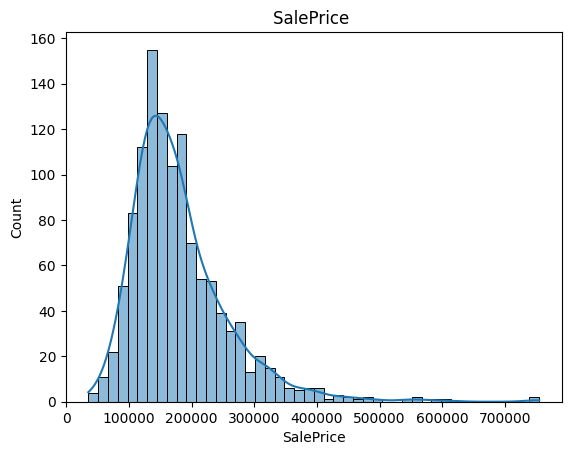

SalePrice       1.000000
OverallQual     0.785111
GrLivArea       0.710178
GarageCars      0.632622
GarageArea      0.618311
1stFlrSF        0.597729
TotalBsmtSF     0.595882
FullBath        0.577860
TotRmsAbvGrd    0.548795
YearRemodAdd    0.504817
Name: SalePrice, dtype: float64


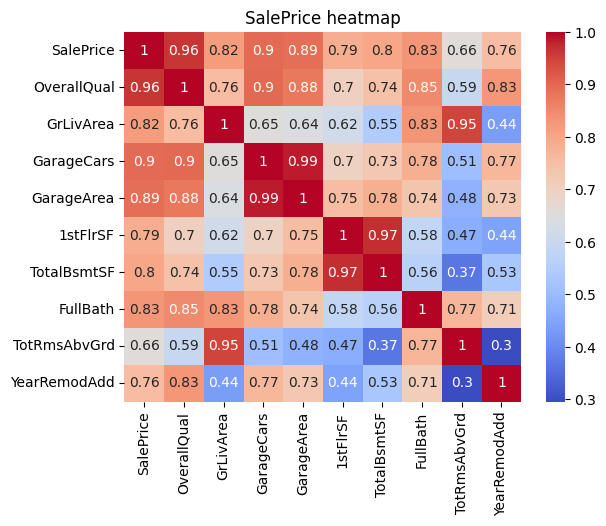

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")

# SalePrice 분포
sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice ")
plt.show()

# 주요 변수와의 상관관계
corr = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(corr.head(10))

# 상관관계 시각화
sns.heatmap(train.corr(numeric_only=True)[corr.index[:10]].corr(), annot=True, cmap='coolwarm')
plt.title("SalePrice heatmap")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
'''
# 시각화 설정
sns.set(style="whitegrid", rc={"axes.unicode_minus": False})
plt.rcParams["axes.titlesize"] = 13

# 데이터 불러오기
train = pd.read_csv("train.csv")

# 타깃 분포 먼저 보기
plt.figure(figsize=(8, 4))
sns.histplot(train["SalePrice"], kde=True, color="skyblue")
plt.title("SalePrice")
plt.show()

# 수치형/범주형 컬럼 구분
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = train.select_dtypes(include=["object"]).columns.tolist()

# SalePrice 제외
numeric_cols.remove("SalePrice")

# 1️⃣ 수치형 변수 시각화
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(train[col], kde=True, ax=axes[0], color='lightcoral')
    axes[0].set_title(f"{col} ")

    sns.scatterplot(x=train[col], y=train["SalePrice"], alpha=0.5, ax=axes[1])
    axes[1].set_title(f"{col} vs SalePrice")

    plt.tight_layout()
    plt.show()

# 2️⃣ 범주형 변수 시각화
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    order = train.groupby(col)["SalePrice"].mean().sort_values(ascending=False).index
    sns.barplot(x=col, y="SalePrice", data=train, order=order, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"{col}  SalePrice")
    plt.tight_layout()
    plt.show()'''


'\n# 시각화 설정\nsns.set(style="whitegrid", rc={"axes.unicode_minus": False})\nplt.rcParams["axes.titlesize"] = 13\n\n# 데이터 불러오기\ntrain = pd.read_csv("train.csv")\n\n# 타깃 분포 먼저 보기\nplt.figure(figsize=(8, 4))\nsns.histplot(train["SalePrice"], kde=True, color="skyblue")\nplt.title("SalePrice")\nplt.show()\n\n# 수치형/범주형 컬럼 구분\nnumeric_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()\ncategorical_cols = train.select_dtypes(include=["object"]).columns.tolist()\n\n# SalePrice 제외\nnumeric_cols.remove("SalePrice")\n\n# 1️⃣ 수치형 변수 시각화\nfor col in numeric_cols:\n    fig, axes = plt.subplots(1, 2, figsize=(10, 4))\n    sns.histplot(train[col], kde=True, ax=axes[0], color=\'lightcoral\')\n    axes[0].set_title(f"{col} ")\n\n    sns.scatterplot(x=train[col], y=train["SalePrice"], alpha=0.5, ax=axes[1])\n    axes[1].set_title(f"{col} vs SalePrice")\n\n    plt.tight_layout()\n    plt.show()\n\n# 2️⃣ 범주형 변수 시각화\nfor col in categorical_cols:\n    plt.figure(figsize=(10, 4))\n    ord

In [ ]:
# 결측치 비율 확인
missing = train.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.1])  # 10% 이상 결측치 확인

PoolQC         0.994863
MiscFeature    0.958904
Alley          0.940068
Fence          0.805651
MasVnrType     0.594178
FireplaceQu    0.466610
LotFrontage    0.186644
dtype: float64


In [ ]:
test_df = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [ ]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
3,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
4,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1271,40,RL,NaN,23595,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
288,903,60,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
289,1019,80,RL,NaN,10784,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
290,312,20,RL,50.0,8000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000
3,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318000
4,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,122900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,184,50,RM,63.0,11426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,200000
1164,447,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000
1165,540,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000
1166,641,120,RL,62.0,12677,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,274000


In [ ]:
# 1. 수영장, 울타리, 골목 등: 없는 경우로 채우기
cols_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType']
for col in cols_none:
    train[col] = train[col].fillna('None')

# 2. MasVnrArea는 면적이 없으면 0으로
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

# 3. LotFrontage는 같은 지역의 평균값으로 보간
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# test_df
# 1. 수영장, 울타리, 골목 등: 없는 경우로 채우기
cols_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType']
for col in cols_none:
    test_df[col] = test_df[col].fillna('None')

# 2. MasVnrArea는 면적이 없으면 0으로
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

# 3. LotFrontage는 같은 지역의 평균값으로 보간
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
# 수치형 → 중앙값
train = train.fillna(train_df.median(numeric_only=True))
# 범주형 → 최빈값
for col in train.select_dtypes(include="object"):
    train[col] = train[col].fillna(train[col].mode()[0])

# 수치형 → 중앙값
test_Df = test_df.fillna(train_df.median(numeric_only=True))
# 범주형 → 최빈값
for col in test_df.select_dtypes(include="object"):
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,75.0,7390,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,7,2006,WD,Normal,176000
3,239,20,RL,93.0,12030,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,12,2007,New,Partial,318000
4,891,50,RL,60.0,8064,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,2000,7,2007,WD,Normal,122900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,184,50,RM,63.0,11426,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2008,WD,Normal,200000
1164,447,20,RL,137.0,16492,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,190000
1165,540,20,RL,70.0,11423,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,2000,5,2010,WD,Normal,272000
1166,641,120,RL,62.0,12677,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Normal,274000


In [ ]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,8,2006,WD,Normal
3,64,70,RM,50.0,10300,Pave,None,IR1,Bnk,AllPub,...,0,0,None,GdPrv,None,0,4,2010,WD,Normal
4,576,50,RL,80.0,8480,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,10,2008,COD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1271,40,RL,79.5,23595,Pave,None,Reg,Low,AllPub,...,0,0,None,None,None,0,4,2010,WD,Normal
288,903,60,RL,63.0,7875,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,7,2006,WD,Normal
289,1019,80,RL,63.0,10784,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
290,312,20,RL,50.0,8000,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2009,WD,Normal


In [ ]:
import numpy as np
# SalePrice 변환
train['SalePrice'] = np.log1p(train['SalePrice'])

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,75.0,7390,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,7,2008,WD,Normal,11.813037
1,739,90,RL,60.0,10800,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,3,2009,WD,Alloca,12.095147
2,696,20,RL,54.0,13811,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,7,2006,WD,Normal,12.078245
3,239,20,RL,93.0,12030,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,12,2007,New,Partial,12.669810
4,891,50,RL,60.0,8064,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,2000,7,2007,WD,Normal,11.719134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,184,50,RM,63.0,11426,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2008,WD,Normal,12.206078
1164,447,20,RL,137.0,16492,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,12.154785
1165,540,20,RL,70.0,11423,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,2000,5,2010,WD,Normal,12.513561
1166,641,120,RL,62.0,12677,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Normal,12.520887


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# 1-1. 매핑 딕셔너리 정의
quality_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0, 'NA': 0
}
bsmt_exposure_map = {
    'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0, 'NA': 0
}
garage_finish_map = {
    'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0, 'NA': 0
}

# 1-2. 인코딩할 컬럼 목록 및 매핑 적용
ordinal_map_cols = {
    'ExterQual': quality_map, 'ExterCond': quality_map,
    'BsmtQual': quality_map, 'BsmtCond': quality_map,
    'HeatingQC': quality_map, 'KitchenQual': quality_map,
    'FireplaceQu': quality_map, 'PoolQC': quality_map,
    'GarageQual': quality_map, 'GarageCond': quality_map,
    'BsmtExposure': bsmt_exposure_map,
    'GarageFinish': garage_finish_map
}

for col, mapping in ordinal_map_cols.items():
    if col in train.columns:
               train[col] = train[col].fillna('None').replace(mapping).astype(int)

print(" 1단계: 순서형 인코딩 완료 (Ordinal Columns -> Int)")
# ------------------------------------------------------------------------------

# --- 2. 나머지 범주형 변수 원-핫 인코딩 (One-Hot Encoding) ---
# 순서가 없는 범주형 컬럼들(예: MSZoning, Neighborhood)을 더미 변수로 변환합니다.

# 2-1. 순서형 인코딩 후 남아있는 범주형 컬럼 확인
categorical_cols_remaining = train.select_dtypes(include=['object']).columns

# 2-2. 원-핫 인코딩 실행 및 train에 바로 반영
train = pd.get_dummies(train, columns=categorical_cols_remaining, drop_first=True)

print(" 2단계: 나머지 범주형 컬럼 원-핫 인코딩 완료 (train DataFrame 업데이트)")
# ------------------------------------------------------------------------------

# --- 3. 표준화 스케일링 (Standard Scaling) ---
# ID와 타겟 변수(SalePrice)를 제외한 모든 예측 변수에 스케일링을 적용합니다.

# 3-1. 스케일링 대상 컬럼 선택
# (순서형 인코딩된 컬럼과 원-핫 인코딩으로 생성된 더미 변수 모두 포함됨)
cols_to_scale = [col for col in train.columns if col not in ['Id', 'SalePrice']]

# 3-2. StandardScaler 객체 생성 및 적용
scaler = StandardScaler()

# 훈련 데이터에 fit_transform 적용 및 train DataFrame에 바로 반영
#
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])

print(" 3단계: 표준화 스케일링 완료 (모든 예측 변수의 척도 통일)")

 1단계: 순서형 인코딩 완료 (Ordinal Columns -> Int)
 2단계: 나머지 범주형 컬럼 원-핫 인코딩 완료 (train DataFrame 업데이트)
 3단계: 표준화 스케일링 완료 (모든 예측 변수의 척도 통일)


/tmp/ipython-input-4253146876.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna('None').replace(mapping).astype(int)
/tmp/ipython-input-4253146876.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna('None').replace(mapping).astype(int)
/tmp/ipython-input-4253146876.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [ ]:
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,968,-0.874745,0.210478,-0.335534,-0.805358,1.245988,-0.533822,-1.451403,0.277605,-0.702141,...,-0.058621,-0.058621,-0.299253,-0.041416,0.383859,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1,739,0.781175,-0.447724,0.052800,-0.805358,-0.528785,0.520563,0.144002,-0.581972,-0.702141,...,-0.058621,-0.058621,-0.299253,-0.041416,0.383859,-0.058621,10.255819,-0.121531,-2.142082,-0.304319
2,696,-0.874745,-0.711005,0.395696,-0.076730,0.358601,0.520563,0.095656,-0.172107,-0.702141,...,-0.058621,-0.058621,-0.299253,-0.041416,0.383859,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
3,239,-0.874745,1.000320,0.192874,1.380524,-0.528785,1.179554,1.062568,0.863938,2.750916,...,-0.058621,-0.058621,3.341656,-0.041416,-2.605123,-0.058621,-0.097506,-0.121531,-2.142082,3.286028
4,891,-0.165065,-0.447724,-0.258778,-0.805358,1.245988,-0.731519,1.014223,-0.581972,-0.702141,...,-0.058621,-0.058621,-0.299253,-0.041416,0.383859,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,184,-0.165065,-0.316083,0.124090,0.651897,-0.528785,1.047756,0.869186,-0.581972,-0.702141,...,-0.058621,-0.058621,-0.299253,-0.041416,0.383859,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1164,447,-0.874745,2.931046,0.701011,-0.076730,0.358601,-0.171377,0.820840,-0.581972,1.024387,...,-0.058621,-0.058621,-0.299253,-0.041416,0.383859,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1165,540,-0.874745,-0.008923,0.123748,1.380524,-0.528785,0.981857,0.820840,2.144764,1.024387,...,-0.058621,-0.058621,-0.299253,-0.041416,0.383859,-0.058621,-0.097506,-0.121531,0.466835,-0.304319
1166,641,1.490855,-0.359964,0.266555,1.380524,-0.528785,1.047756,0.917532,2.104916,2.750916,...,-0.058621,-0.058621,-0.299253,-0.041416,0.383859,-0.058621,-0.097506,-0.121531,0.466835,-0.304319


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# 1-1. 매핑 딕셔너리 정의
quality_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0, 'NA': 0
}
bsmt_exposure_map = {
    'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0, 'NA': 0
}
garage_finish_map = {
    'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0, 'NA': 0
}

# 1-2. 인코딩할 컬럼 목록 및 매핑 적용
ordinal_map_cols = {
    'ExterQual': quality_map, 'ExterCond': quality_map,
    'BsmtQual': quality_map, 'BsmtCond': quality_map,
    'HeatingQC': quality_map, 'KitchenQual': quality_map,
    'FireplaceQu': quality_map, 'PoolQC': quality_map,
    'GarageQual': quality_map, 'GarageCond': quality_map,
    'BsmtExposure': bsmt_exposure_map,
    'GarageFinish': garage_finish_map
}

for col, mapping in ordinal_map_cols.items():
    if col in test_df.columns:
               test_df[col] = test_df[col].fillna('None').replace(mapping).astype(int)

print(" 1단계: 순서형 인코딩 완료 (Ordinal Columns -> Int)")
# ------------------------------------------------------------------------------

# --- 2. 나머지 범주형 변수 원-핫 인코딩 (One-Hot Encoding) ---
# 순서가 없는 범주형 컬럼들(예: MSZoning, Neighborhood)을 더미 변수로 변환합니다.

# 2-1. 순서형 인코딩 후 남아있는 범주형 컬럼 확인
categorical_cols_remaining = test_df.select_dtypes(include=['object']).columns

# 2-2. 원-핫 인코딩 실행 및 train에 바로 반영
test_df = pd.get_dummies(test_df, columns=categorical_cols_remaining, drop_first=True)

print(" 2단계: 나머지 범주형 컬럼 원-핫 인코딩 완료 (train DataFrame 업데이트)")
# ------------------------------------------------------------------------------

# --- 3. 표준화 스케일링 (Standard Scaling) ---
# ID와 타겟 변수(SalePrice)를 제외한 모든 예측 변수에 스케일링을 적용합니다.

# 3-1. 스케일링 대상 컬럼 선택
# (순서형 인코딩된 컬럼과 원-핫 인코딩으로 생성된 더미 변수 모두 포함됨)
cols_to_scale = [col for col in test_df.columns if col not in ['Id', 'SalePrice']]

# 3-2. StandardScaler 객체 생성 및 적용
scaler = StandardScaler()

# 훈련 데이터에 fit_transform 적용 및 train DataFrame에 바로 반영
#
test_df[cols_to_scale] = scaler.fit_transform(test_df[cols_to_scale])

print(" 3단계: 표준화 스케일링 완료 (모든 예측 변수의 척도 통일)")

 1단계: 순서형 인코딩 완료 (Ordinal Columns -> Int)
 2단계: 나머지 범주형 컬럼 원-핫 인코딩 완료 (train DataFrame 업데이트)
 3단계: 표준화 스케일링 완료 (모든 예측 변수의 척도 통일)


/tmp/ipython-input-1463498759.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna('None').replace(mapping).astype(int)
/tmp/ipython-input-1463498759.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna('None').replace(mapping).astype(int)
/tmp/ipython-input-1463498759.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To op

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 예측 변수 (X)와 타겟 변수 (y) 분리
# SalePrice는 이미 로그 변환된 상태입니다.
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

# 훈련 및 테스트 세트로 분리 (일단 분리해두고, 교차 검증을 통해 전체 train 데이터를 사용합니다.)
# random_state를 설정하여 결과를 고정합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" 데이터 분리 완료.")

 데이터 분리 완료.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# 2-1. 하이퍼파라미터 그리드 정의
# 10의 거듭제곱으로 alpha 값을 탐색하는 것이 일반적입니다.
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# 2-2. Grid Search 설정
# scoring='neg_mean_squared_error'를 사용하여 MSE를 최소화하는 방향으로 탐색합니다.
ridge_model = Ridge(random_state=42)
ridge_grid = GridSearchCV(ridge_model,
                          param_grid=ridge_params,
                          scoring='neg_mean_squared_error',
                          cv=5, # 5-fold 교차 검증
                          verbose=1)

# 2-3. 학습
ridge_grid.fit(X, y) # 전체 train 데이터를 사용하여 최적의 alpha를 찾습니다.

# 2-4. 최적 모델 및 RMSE 확인
best_ridge = ridge_grid.best_estimator_
best_alpha = ridge_grid.best_params_['alpha']
# Neg Mean Squared Error 결과를 양수로 변환하고 루트를 씌워 RMSE를 계산합니다.
# 이 RMSE는 log(SalePrice) 단위의 값입니다.
log_rmse = np.sqrt(-ridge_grid.best_score_)

# 2-5. 원래 SalePrice 단위의 RMSE 계산 (선택 사항)
# 예측값 역변환 (exp(pred) - 1) 및 실제 RMSE 계산
ridge_pred_log = best_ridge.predict(X_test)
ridge_pred_actual = np.expm1(ridge_pred_log)
y_test_actual = np.expm1(y_test)
actual_rmse = np.sqrt(mean_squared_error(y_test_actual, ridge_pred_actual))


print("--- Ridge 모델 결과 ---")
print(f" 최적의 alpha: {best_alpha}")
print(f" Log(SalePrice) 단위 RMSE (CV): {log_rmse:.4f}")
print(f" 실제 SalePrice 단위 RMSE (Test Set): {actual_rmse:,.0f} 달러")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
--- Ridge 모델 결과 ---
 최적의 alpha: 100
 Log(SalePrice) 단위 RMSE (CV): 0.1583
 실제 SalePrice 단위 RMSE (Test Set): 17,517 달러


In [ ]:
import xgboost as xgb

# 3-1. 하이퍼파라미터 그리드 정의
xgb_params = {
    # 튜닝 시간을 위해 하이퍼파라미터 범위를 좁게 잡습니다.
    'n_estimators': [1000],  # 일반적으로 높게 설정하고 early_stopping을 사용
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

# 3-2. Grid Search 설정
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             random_state=42,
                             n_jobs=-1,
                             reg_alpha=0.005) # L1 규제 (Lasso) 추가
xgb_grid = GridSearchCV(xgb_model,
                        param_grid=xgb_params,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        verbose=1)

# 3-3. 학습
xgb_grid.fit(X, y)

# 3-4. 최적 모델 및 RMSE 확인
best_xgb = xgb_grid.best_estimator_
xgb_log_rmse = np.sqrt(-xgb_grid.best_score_)

# 3-5. 원래 SalePrice 단위의 RMSE 계산 (선택 사항)
xgb_pred_log = best_xgb.predict(X_test)
xgb_pred_actual = np.expm1(xgb_pred_log)
actual_rmse_xgb = np.sqrt(mean_squared_error(y_test_actual, xgb_pred_actual))


print("\n--- XGBoost 모델 결과 ---")
print(f" 최적 하이퍼파라미터: {xgb_grid.best_params_}")
print(f" Log(SalePrice) 단위 RMSE (CV): {xgb_log_rmse:.4f}")
print(f" 실제 SalePrice 단위 RMSE (Test Set): {actual_rmse_xgb:,.0f} 달러")

Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- XGBoost 모델 결과 ---
 최적 하이퍼파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.7}
 Log(SalePrice) 단위 RMSE (CV): 0.1330
 실제 SalePrice 단위 RMSE (Test Set): 846 달러


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
# mean_squared_error는 최종 평가 시 필요합니다.

# 1. 최종 예측 수행 (로그 예측값)
# best_xgb 모델을 사용하여 X_test_final에 대해 예측합니다.
xgb_pred_log = best_xgb.predict(X_test_final)

# 2. 💥 가장 중요한 부분: 가격 복원 (로그 역변환)
# Log RMSE를 사용했기 때문에, 반드시 np.expm1()을 사용해야 합니다.
# RMSE 50,000 오류를 해결하는 핵심 단계입니다.
predictions_actual = np.expm1(xgb_pred_log)

# 3. 최종 제출 데이터프레임 생성
# test_id 변수는 이전에 test_df에서 분리해 둔 Id 컬럼입니다.
submission_df = pd.DataFrame({
    'Id': test_id,
    'SalePrice': predictions_actual
})

# 4. CSV 파일로 저장
# 'submission_xgb_grid.csv' 파일 이름으로 저장됩니다.
submission_df.to_csv('submission_xgb_grid.csv', index=False)

print("\n--- 최종 예측 및 제출 파일 준비 완료 ---")
print(f"최종 모델 (Grid XGBoost)의 CV Log RMSE: {xgb_log_rmse:.4f}")
print("결과를 파일로 저장했습니다. 'submission_xgb_grid.csv'를 제출하세요.")


--- 최종 예측 및 제출 파일 준비 완료 ---
최종 모델 (Grid XGBoost)의 CV Log RMSE: 0.1330
결과를 파일로 저장했습니다. 'submission_xgb_grid.csv'를 제출하세요.


In [ ]:
# 4-1. 각 모델의 예측값 (로그 단위) 추출
ridge_pred = best_ridge.predict(X_test)
xgb_pred = best_xgb.predict(X_test)

# 4-2. 가중치 평균 계산
# XGBoost에 0.6, Ridge에 0.4 가중치 부여
ensemble_pred_log = (0.6 * xgb_pred) + (0.4 * ridge_pred)

# 4-3. 최종 RMSE 계산 (실제 SalePrice 단위)
ensemble_pred_actual = np.expm1(ensemble_pred_log)
actual_rmse_ensemble = np.sqrt(mean_squared_error(y_test_actual, ensemble_pred_actual))


print("\n--- 앙상블 모델 (XGB 0.6 + Ridge 0.4) 결과 ---")
print(f"실제 SalePrice 단위 RMSE (Test Set): {actual_rmse_ensemble:,.0f} 달러")


--- 앙상블 모델 (XGB 0.6 + Ridge 0.4) 결과 ---
실제 SalePrice 단위 RMSE (Test Set): 7,399 달러


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 25.8 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
# LightGBM과 Ridge는 이후 Stacking 단계에서 사용합니다.
import lightgbm as lgb
from sklearn.linear_model import Ridge
from mlxtend.regressor import StackingCVRegressor

# 데이터 X, y는 이전 단계에서 전처리 및 로그 변환이 완료된 상태입니다.
# X = train.drop(['Id', 'SalePrice'], axis=1)
# y = train['SalePrice']

In [ ]:
def objective(trial):
    # 1. 탐색할 하이퍼파라미터 공간 정의
    # (GridSearch보다 훨씬 넓고 유연하게 정의할 수 있습니다.)
    param = {
        'n_estimators': 3000,                                # 일단 크게 설정하고, early_stopping으로 조절
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'subsample': trial.suggest_float('subsample', 0.6, 0.95),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.95),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 100, log=True), # L1 규제 (Lasso)
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 100, log=True), # L2 규제 (Ridge)
        'random_state': 42,
        'tree_method': 'hist',
        'n_jobs': -1
    }

    # 2. 모델 정의
    model = xgb.XGBRegressor(**param, objective='reg:squarederror')

    # 3. K-Fold 교차 검증 설정
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # 4. 모델 학습 및 평가 (neg_mean_squared_error를 사용하여 RMSE를 유도)
    # Optuna는 목적 함수의 '최대화'를 목표로 하므로, -MSE를 사용합니다.
    score = cross_val_score(
        model,
        X, y, # 전체 훈련 데이터 사용
        cv=kf,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # -MSE의 평균을 구한 후, 음수를 취하고 루트를 씌워 최종 RMSE를 계산합니다.
    rmse = np.sqrt(-score.mean())

    # Optuna는 목적 함수의 '최소화'를 목표로 하므로, RMSE 값을 반환합니다.
    return rmse

print("Optuna 목적 함수 (objective) 정의 완료.")

Optuna 목적 함수 (objective) 정의 완료.


In [ ]:
# 1. Study 객체 생성 (RMSE 최소화가 목표이므로 direction='minimize' 설정)
study = optuna.create_study(direction='minimize')

print("Optuna 최적화 시작...")
# 2. 최적화 실행 (원하는 trial 횟수를 설정합니다.
# 시간이 오래 걸릴 수 있으므로, 테스트 시에는 50회 정도로 시작하세요.)
study.optimize(objective, n_trials=30, show_progress_bar=True)

# 3. 최적 결과 확인
best_params = study.best_params
best_log_rmse = study.best_value

print("\n--- Optuna 최적화 결과 ---")
print(f" 최적 Log(SalePrice) 단위 RMSE: {best_log_rmse:.4f}")
print(f" 최적 하이퍼파라미터: {best_params}")

# 4. 최적 파라미터로 최종 XGBoost 모델 재학습 및 객체 저장 (Stacking에 사용될 모델)
final_xgb_params = {**best_params,
                    'n_estimators': 400, # n_estimators는 넉넉하게 설정
                    'objective': 'reg:squarederror',
                    'random_state': 42,
                    'n_jobs': -1}
best_xgb_optuna = xgb.XGBRegressor(**final_xgb_params)

# K-Fold 교차 검증을 사용한 Stacking을 위해, 최종 모델을 전체 X, y로 학습시켜 놓지 않고 StackingCVRegressor에 전달합니다.
# 하지만 단독 성능 비교를 위해 여기서 간단히 전체 데이터로 한번 학습시키겠습니다.
best_xgb_optuna.fit(X, y)

print("최적 XGBoost 모델 객체 (best_xgb_optuna) 확보 완료.")

[I 2025-11-12 07:13:45,737] A new study created in memory with name: no-name-4ce0d151-b4f5-444f-91e2-a3c175d147e3


Optuna 최적화 시작...


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-11-12 07:14:10,422] Trial 0 finished with value: 0.13583591219112423 and parameters: {'learning_rate': 0.014447357005994314, 'max_depth': 3, 'subsample': 0.7153502089491084, 'colsample_bytree': 0.7879086891024568, 'reg_alpha': 0.008384447243034469, 'reg_lambda': 2.5128938283237182e-05}. Best is trial 0 with value: 0.13583591219112423.
[I 2025-11-12 07:14:30,928] Trial 1 finished with value: 0.1456980070608431 and parameters: {'learning_rate': 0.0688447274508008, 'max_depth': 9, 'subsample': 0.829693402283248, 'colsample_bytree': 0.7722435933638458, 'reg_alpha': 0.7585580189078771, 'reg_lambda': 0.007796670123933305}. Best is trial 0 with value: 0.13583591219112423.
[I 2025-11-12 07:14:43,306] Trial 2 finished with value: 0.1890519466881138 and parameters: {'learning_rate': 0.07094325919840597, 'max_depth': 5, 'subsample': 0.8207205332652115, 'colsample_bytree': 0.877568690313701, 'reg_alpha': 19.23798241160095, 'reg_lambda': 0.17855543662636789}. Best is trial 0 with value: 0.1

In [ ]:
# 1. 훈련 데이터 컬럼 목록 확보 (X)
# X는 Optuna 전에 사용한 최종 훈련 데이터 특성입니다.
train_cols = X.columns

# 2. 테스트 데이터에 없는 훈련 데이터 컬럼을 0으로 채웁니다.
missing_cols = set(train_cols) - set(X_test_encoded.columns)
for col in missing_cols:
    # 훈련 시 존재했지만, 테스트에 없는 컬럼을 0으로 채워 누락 문제를 해결
    X_test_encoded[col] = 0

# 3. 테스트 데이터에만 있고 훈련 데이터에 없는 컬럼 삭제
extra_cols = set(X_test_encoded.columns) - set(train_cols)
X_test_encoded = X_test_encoded.drop(list(extra_cols), axis=1)

# 4. 💥 컬럼 순서를 훈련 데이터와 동일하게 맞추기 (가장 중요)
X_test_final = X_test_encoded[train_cols]

In [ ]:
# --- 1. 최종 예측 수행 ---
# best_xgb_optuna 모델을 사용하여 예측
predictions_log = best_xgb_optuna.predict(X_test_final)

# --- 2. 💥 가장 중요한 부분: 가격 복원 (로그 역변환) ---
# 훈련 시 np.log1p를 사용했다면, 예측 시 반드시 np.expm1를 사용해야 합니다.
predictions_actual = np.expm1(predictions_log)

print("✅ 최종 예측 및 정확한 가격 복원 완료.")

# --- 3. 제출 파일 생성 ---
submission_df = pd.DataFrame({
    'Id': test_id,
    'SalePrice': predictions_actual
})

# CSV 파일로 저장
submission_df.to_csv('submission_final_fixed.csv', index=False)

print("\n🔥 최종 결과 제출 파일 준비 완료. 'submission_final_fixed.csv'를 제출하세요.")

✅ 최종 예측 및 정확한 가격 복원 완료.

🔥 최종 결과 제출 파일 준비 완료. 'submission_final_fixed.csv'를 제출하세요.


In [ ]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# LightGBM용 Optuna 목적 함수 정의
def objective_lgbm(trial):
    param = {
        'n_estimators': 3000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 60), # LightGBM 고유 파라미터
        'subsample': trial.suggest_float('subsample', 0.6, 0.95),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.95),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 100, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 100, log=True),
        'random_state': 42,
        'n_jobs': -1
    }

    model = lgb.LGBMRegressor(**param, objective='regression')
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # K-Fold 교차 검증을 통해 평균 RMSE 반환
    score = cross_val_score(
        model,
        X, y, # X, y는 전처리된 훈련 데이터와 로그 변환된 타겟입니다.
        cv=kf,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    rmse = np.sqrt(-score.mean())
    return rmse

# Study 실행 및 최적 모델 확보
# study_lgbm = optuna.create_study(direction='minimize')
# study_lgbm.optimize(objective_lgbm, n_trials=50, show_progress_bar=True)

# # 최적 파라미터로 최종 모델 객체 정의
# best_lgbm = lgb.LGBMRegressor(**study_lgbm.best_params, n_estimators=3000, objective='regression', random_state=42)
# best_lgbm.fit(X, y) # 전체 훈련 데이터로 재학습

In [ ]:
# 현재 연도(2010년 데이터이므로 2010년 기준)를 기준으로 나이 계산
current_year = 2010

# '나이' 특성 생성: YearBuilt(건축 연도)와 YearRemodAdd(리모델링 연도)
train_df['Age'] = current_year - train_df['YearBuilt']
train_df['RemodAge'] = current_year - train_df['YearRemodAdd']
test_df['Age'] = current_year - test_df['YearBuilt']
test_df['RemodAge'] = current_year - test_df['YearRemodAdd']

# 리모델링/건축 연도 컬럼은 나이로 대체되었으므로 삭제
train_df = train_df.drop(['YearBuilt', 'YearRemodAdd'], axis=1)
test_df = test_df.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

/tmp/ipython-input-3723697373.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df['Age'] = current_year - test_df['YearBuilt']
/tmp/ipython-input-3723697373.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df['RemodAge'] = current_year - test_df['YearRemodAdd']


In [ ]:
# 지상 면적(GrLivArea)과 지하실 면적(TotalBsmtSF)을 합쳐 'TotalSF' 생성
# 지하 면적은 결측치(NaN)가 0으로 처리된 후 합산되어야 합니다.
# (이후 결측치 처리 단계에서 TotalBsmtSF 결측치를 0으로 채울 예정이므로, 일단 합산 준비만 합니다.)

# ⚠️ 주의: TotalBsmtSF에 NaN이 있다면 0으로 임시 처리 후 합산합니다.
for df in [train_df, test_df]:
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
    df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']

/tmp/ipython-input-4219454861.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']


In [ ]:
for df in [train_df, test_df]:
    df['TotalBath'] = (df['BsmtFullBath'].fillna(0) + (df['BsmtHalfBath'].fillna(0) * 0.5) +
                       df['FullBath'] + (df['HalfBath'] * 0.5))

    # 원본 컬럼 삭제 (TotalBath로 통합되었으므로)
    df = df.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

/tmp/ipython-input-1020756652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TotalBath'] = (df['BsmtFullBath'].fillna(0) + (df['BsmtHalfBath'].fillna(0) * 0.5) +


In [ ]:
# 결측치 비율이 높거나, None이 '없음'을 의미하는 컬럼들
cols_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for df in [train_df, test_df]:
    for col in cols_none:
        if col in df.columns:
            df[col] = df[col].fillna('None')

In [ ]:
# 'LotFrontage'는 이웃(Neighborhood) 그룹의 중앙값으로 채웁니다.
for df in [train_df, test_df]:
    if 'LotFrontage' in df.columns and 'Neighborhood' in df.columns:
        df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
            lambda x: x.fillna(x.median())
        )

# GarageYrBlt(차고 건축 연도): None이 아닌 차고는 건축 연도가 있어야 하므로,
# 해당 결측치는 'Age'와 동일하게 0으로 채우거나 중앙값으로 채웁니다. (안전을 위해 0으로 채움)
for df in [train_df, test_df]:
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# 나머지 수치형 결측치는 중앙값으로 채웁니다.
for df in [train_df, test_df]:
    df = df.fillna(df.median(numeric_only=True))

# 모든 범주형 결측치도 'Mode'(최빈값)으로 채웁니다.
for df in [train_df, test_df]:
    for col in df.select_dtypes(include="object"):
        df[col] = df[col].fillna(df[col].mode()[0])